寻找赔钱的操作！
MA60 的斜率

In [1]:
from analysis_utils import *
from utils import date_to_milliseconds
pd.set_option('display.max_columns', None)

<Figure size 1000x500 with 0 Axes>

In [2]:
usd_name = 'TUSD'
token_name = 'BTC'
is_futures = False
symbol = token_name + usd_name
sim_data = get_combined_data(symbol, 'SellAfter2Step-TH2', 1682655420000, 1688655419999, is_futures, confirm_step=2)
sim_data_info = read_data(symbol, 'SellAfter2Step-TH2', 1682655420000, 1688655419999, is_futures)
print(f"data length = {len(sim_data)}")

buy_p    = sim_data_info.buy_points
sell_p   = sim_data_info.sell_points

sim_data['buy_price'] = np.nan
sim_data['sell_price'] = np.nan

j = 0
fee = 0.00002
for i in range(len(sim_data)):
    if sim_data['open_time'][i] == buy_p.idx[j]:
        # Record these info on the preview step of the actually traded step
        curr_idx: int = sim_data.index[i]  # type: ignore
        pre_idx = curr_idx - 1

        sim_data.loc[pre_idx, 'buy_price'] = buy_p.value[j]
        sim_data.loc[pre_idx, 'hold_step'] = (sell_p.idx[j] - buy_p.idx[j]) // 60000
        sim_data.loc[pre_idx, 'sell_price'] = sell_p.value[j]
        sim_data.loc[pre_idx, 'earn'] = (sell_p.value[j] - buy_p.value[j]) * (1 - 2 * fee) / buy_p.value[j]

        if sim_data.loc[pre_idx, 'is_up'] == 0:  
            # bottom is not confirmed.
            top_idx = pre_idx - sim_data.loc[pre_idx, 'step_after_top'] # type: ignore
            i_min = int(np.argmin(sim_data.loc[top_idx: pre_idx, 'low']))
            
            sim_data.loc[pre_idx, 'last_bottom'] = sim_data.loc[top_idx + i_min, 'low']
            sim_data.loc[pre_idx, 'step_after_bottom'] = pre_idx - top_idx - i_min
            sim_data.loc[pre_idx, 'cycle_step'] = i_min
        
        j += 1
        if j >= len(sell_p.idx):
            break

# sim_data[sim_data['buy_price'].isnull() == False].head()

data length = 100000


In [3]:
# sim_data[sim_data['buy_price'].isnull() == False].head()
sim_data.loc[8561-5 : 8561+5]
# sim_data.head(10)

,open_time,open,high,low,close,volume,close_time,quote_assert_volume,number_of_trades,taker_buy_volume,taker_buy_quote_asset_volume,TR,last_top,step_after_top,last_bottom,step_after_bottom,is_up,cycle_step,buy_price,sell_price,hold_step,earn
8556,1.683169e+12,29047.35,29051.11,29034.44,29049.54,18.58266,1.683169e+12,5.396748e+05,2012.0,9.01462,2.618160e+05,16.67,29057.48,2.0,29030.88,2.0,0.0,0.0,29058.02,29066.26,2.0,0.000284
8557,1.683169e+12,29049.86,29072.70,29047.17,29062.46,30.81193,1.683169e+12,8.954692e+05,3084.0,17.17230,4.990787e+05,25.53,29057.48,3.0,29034.44,1.0,1.0,2.0,NaN,NaN,NaN,NaN
8558,1.683169e+12,29062.80,29074.73,29060.69,29065.85,19.88911,1.683169e+12,5.781293e+05,2361.0,8.30756,2.414876e+05,14.04,29057.48,4.0,29034.44,2.0,1.0,2.0,NaN,NaN,NaN,NaN
8559,1.683169e+12,29066.26,29075.00,29035.19,29043.40,34.81400,1.683169e+12,1.011480e+06,2815.0,17.20325,4.998139e+05,39.81,29057.48,5.0,29034.44,3.0,1.0,2.0,NaN,NaN,NaN,NaN
8560,1.683169e+12,29043.39,29043.60,29011.69,29018.55,44.01858,1.683169e+12,1.277751e+06,2843.0,18.65537,5.415629e+05,31.91,29075.00,1.0,29034.44,4.0,0.0,3.0,NaN,NaN,NaN,NaN
8561,1.683169e+12,29018.72,29020.65,29007.71,29010.38,21.96604,1.683169e+12,6.373219e+05,2299.0,9.74837,2.828561e+05,12.94,29075.00,2.0,29007.71,0.0,0.0,2.0,29075.02,29081.58,2.0,0.000226
8562,1.683169e+12,29008.15,29088.63,29006.56,29082.48,92.79009,1.683169e+12,2.695953e+06,5038.0,57.66868,1.675482e+06,82.07,29075.00,3.0,29006.56,0.0,1.0,3.0,NaN,NaN,NaN,NaN
8563,1.683169e+12,29077.95,29103.77,29073.73,29081.58,47.68612,1.683169e+12,1.387207e+06,2985.0,22.65436,6.590754e+05,30.04,29075.00,4.0,29006.56,1.0,1.0,3.0,NaN,NaN,NaN,NaN
8564,1.683169e+12,29081.58,29083.06,29055.13,29063.50,21.30827,1.683169e+12,6.193755e+05,1736.0,6.63604,1.929081e+05,27.93,29075.00,5.0,29006.56,2.0,1.0,3.0,NaN,NaN,NaN,NaN
8565,1.683169e+12,29064.01,29066.13,29048.37,29051.54,57.26961,1.683169e+12,1.664053e+06,2287.0,30.14603,8.760265e+05,17.76,29103.77,2.0,29006.56,3.0,0.0,1.0,NaN,NaN,NaN,NaN


In [4]:
total_num = sum(sim_data['buy_price'].isnull() == False)
print(f"Total: {total_num}")
earn_num = sum(sim_data['earn'] > 0)
print(f"Earn rate: {earn_num / total_num * 100 :.2f}%")
print(f"Average earn: {sim_data[sim_data['buy_price'].isnull() == False]['earn'].mean() * 100 :.4f}%")

Total: 7104
Earn rate: 48.47%
Average earn: 0.0038%


In [5]:
target = Target(target_step=3, steps=[3])
full_data = FeatData(sim_data, target)

# Drop useless features
full_data.drop_features(
   ['close_time', 'volume', 'taker_buy_volume', 'open_time', 'buy_price', 'sell_price'])

full_data.set_features_type(['hold_step'], FeatTypes.OTHERS)
full_data.set_features_type(['earn'], FeatTypes.TARGET)
full_data.add_feature('is_earn', FeatTypes.TARGET, lambda df: df['earn'].apply(lambda x: 1 if x > 0 else 0))

full_data.add_feature('max_after_top', FeatTypes.TARGET, lambda df: 
                      (df['high'].rolling(3).max().shift(-3) - df['last_top']) / df['close']) # / df['close']  
full_data.add_feature('min_after_top', FeatTypes.TARGET, lambda df: 
                      (df['low'].rolling(2).min().shift(-3) - df['last_top']) / df['close'])  

full_data.add_feature('TR', FeatTypes.TR, lambda df: df['high'] - df['low'] + 0.000001)   # Incase TR is 0
full_data.add_feature('ER', FeatTypes.OTHERS, lambda df: (df['close'] - df['close'].shift(1)) / df['TR'])
full_data.add_feature('ERabs', FeatTypes.OTHERS, lambda df: df['ER'].abs())

full_data.add_feature('2step_inc', FeatTypes.DPRICE, lambda df: df['last_top'] - df['close'].shift(1))
full_data.add_feature('top-bottom/step', FeatTypes.DPRICE, lambda df: 
                      (df['last_top'] - df['last_bottom']) / (1 + df['step_after_bottom']))

full_data.add_feature('btm_step/top_step', FeatTypes.OTHERS, lambda df: df['step_after_bottom'] / df['step_after_top'])

# Add last last top and bottom
def add_last_tb(df: DataFrame):
    last_top = np.nan
    last_bottom = np.nan
    ll_top = np.nan
    ll_bottom = np.nan

    def fun(x):
        nonlocal ll_top, ll_bottom, last_top, last_bottom
        if x['last_top'] != last_top:
            ll_top = last_top
            last_top = x['last_top']
        
        if x['last_bottom'] != last_bottom:
            ll_bottom = last_bottom
            last_bottom = x['last_bottom']

        return ll_top, ll_bottom

    return df.apply(
            lambda x: fun(x), axis=1, result_type="expand")  # type: ignore

full_data.add_features(['ll_top', 'll_bottom'], [FeatTypes.PRICE, FeatTypes.PRICE], add_last_tb)
full_data.add_feature('ll_l_top', FeatTypes.DPRICE, lambda df: df['ll_top'] - df['last_top'])
full_data.add_feature('ll_l_bottom', FeatTypes.DPRICE, lambda df: df['ll_bottom'] - df['last_bottom'])

# 单位波动的成交额 -> 无效
# full_data.add_feature('volume/TR', FeatTypes.VOL_TR, lambda df: df['quote_assert_volume'] * df['close'] / df['TR'])
add_ave_features(full_data, cycles = [60], feat_names=['quote_assert_volume'])
full_data.add_feature('E/V', FeatTypes.DPRICE, lambda df: 
                      (df['close'] - df['close'].shift(1)) / (df['quote_assert_volume'] / df['AQAV60']))
full_data.drop_features(['quote_assert_volume', 'taker_buy_quote_asset_volume', 'AQAV60'])

# Add features
add_ave_features(full_data, cycles = [3, 10, 60], feat_names=['close', 'TR'])
add_ave_features(full_data, cycles = [3, 10, 20, 60], feat_names=['ER'], new_ave_of_base={'AER': ['ER', FeatTypes.OTHERS]})
add_ave_features(full_data, cycles = [3, 10, 20, 60], feat_names=['ERabs'], new_ave_of_base={'AERabs': ['ERabs', FeatTypes.OTHERS]})

full_data.add_feature('std10', FeatTypes.DPRICE, lambda df: (df['close'] - df['MA10']).rolling(10).mean())
full_data.add_feature('std10abs', FeatTypes.DPRICE, lambda df: (df['close'] - df['MA10']).abs().rolling(10).mean())


# fast_period = 10 
# slow_period = 60
# signal_period = 30
add_macd(full_data, 'close', FeatTypes.DPRICE)
add_macd(full_data, 'ER', FeatTypes.OTHERS)

# Standardization
full_data.std()

# Drop na at last
full_data.drop_na()

full_data.df.head()

,open,high,low,TR,last_top,step_after_top,last_bottom,step_after_bottom,is_up,cycle_step,hold_step,earn,earn_after_3,is_earn,max_after_top,min_after_top,ER,ERabs,2step_inc,top-bottom/step,btm_step/top_step,ll_top,ll_bottom,ll_l_top,ll_l_bottom,E/V,MA3,MA10,MA60,ATR3,ATR10,ATR60,AER3,AER10,AER20,AER60,AERabs3,AERabs10,AERabs20,AERabs60,std10,std10abs,MACD_close,signal_close,histogram_close,MACD_ER,signal_ER,histogram_ER
60,1.000064,1.000163,0.999885,0.000278,1.000192,2.0,0.999450,2.0,0.0,0.0,2.0,-0.000230,0.000238,0,0.000277,-0.000466,-0.065693,0.065693,0.000174,0.000247,1.0,1.001667,0.998708,0.001475,-0.000742,-0.000032,1.000032,0.999472,0.999501,0.000557,0.000560,0.000606,0.141996,0.063728,-0.074357,-0.024946,0.246209,0.357644,0.348710,0.412185,0.000134,0.000326,0.000057,-0.000025,0.000083,0.041494,0.024679,0.016815
63,0.999744,1.000201,0.999736,0.000465,1.000231,1.0,0.999489,1.0,0.0,0.0,2.0,-0.000307,0.000254,0,0.000056,-0.000392,0.549891,0.549891,0.000487,0.000371,1.0,0.999955,0.999693,-0.000277,0.000204,0.000485,0.999885,0.999513,0.999309,0.000528,0.000550,0.000598,0.239553,0.173072,0.019274,-0.008623,0.389052,0.402617,0.349369,0.407803,0.000339,0.000410,0.000144,0.000046,0.000098,0.070417,0.040469,0.029949
78,0.999795,1.000117,0.999448,0.000669,1.000743,5.0,0.999448,0.0,0.0,5.0,2.0,0.001147,0.002274,1,0.001692,0.000221,0.382979,0.382979,0.000999,0.001295,0.0,1.001269,1.000036,0.000526,0.000588,0.000173,0.999927,1.000284,1.000349,0.000485,0.000459,0.000545,-0.223921,-0.189921,-0.108681,-0.034955,0.479240,0.383136,0.387977,0.401913,-0.000367,0.000367,-0.000112,-0.000001,-0.000111,-0.063069,-0.061372,-0.001697
88,0.999955,1.000074,0.999375,0.000699,1.000174,2.0,0.999361,2.0,0.0,0.0,2.0,0.000359,-0.000350,1,0.000854,-0.000597,0.000000,0.000000,0.000174,0.000271,1.0,1.000465,0.999346,0.000291,-0.000015,0.000000,1.000017,0.999830,0.998647,0.000638,0.000807,0.000587,0.165177,0.100138,-0.044891,-0.028427,0.248511,0.434225,0.408680,0.426792,0.000792,0.000792,0.000394,0.000290,0.000103,0.010165,0.007658,0.002507
117,1.000083,1.000136,0.999789,0.000346,1.000468,4.0,0.999695,4.0,0.0,0.0,2.0,0.000277,0.000366,1,0.000850,-0.000461,-0.231672,0.231672,0.000388,0.000155,1.0,1.001080,0.999237,0.000612,-0.000458,-0.000199,1.000089,0.999931,1.000603,0.000357,0.000511,0.000567,-0.048872,0.083319,-0.065535,-0.062752,0.315539,0.389788,0.338203,0.393841,0.000120,0.000254,-0.000173,-0.000237,0.000064,0.029569,0.044867,-0.015298


In [6]:
price_feats  = set(full_data.cols_of_features([FeatTypes.PRICE]))
dprice_feats = set(full_data.cols_of_features([FeatTypes.DPRICE]))
tr_feats     = set(full_data.cols_of_features([FeatTypes.TR]))
vol_feats    = set(full_data.cols_of_features([FeatTypes.VOLUME]))
voltr_feats  = set(full_data.cols_of_features([FeatTypes.VOL_TR]))
tn_feats     = set(full_data.cols_of_features([FeatTypes.TRADE_NUM]))
print(f"price_feats: {price_feats}\n\
        dprice_feats: {dprice_feats}\n\
        tr_feats: {tr_feats}\n\
        vol_feats: {vol_feats}\n\
        voltr_feats: {voltr_feats}\n\
        tn_feats: {tn_feats}")
print(f"{set(full_data.df.columns) - price_feats - dprice_feats - tr_feats - vol_feats - tn_feats}")

price_feats: {'low', 'last_bottom', 'open', 'MA60', 'll_bottom', 'last_top', 'll_top', 'high', 'MA3', 'MA10'}
        dprice_feats: {'ll_l_top', 'MACD_close', 'll_l_bottom', '2step_inc', 'top-bottom/step', 'std10', 'histogram_close', 'signal_close', 'E/V', 'std10abs'}
        tr_feats: {'ATR60', 'ATR3', 'TR', 'ATR10'}
        vol_feats: set()
        voltr_feats: set()
        tn_feats: set()
{'AERabs10', 'signal_ER', 'AER3', 'is_up', 'ERabs', 'AERabs20', 'ER', 'max_after_top', 'MACD_ER', 'AERabs3', 'hold_step', 'AER20', 'min_after_top', 'AERabs60', 'earn', 'earn_after_3', 'step_after_bottom', 'btm_step/top_step', 'AER10', 'cycle_step', 'is_earn', 'histogram_ER', 'step_after_top', 'AER60'}


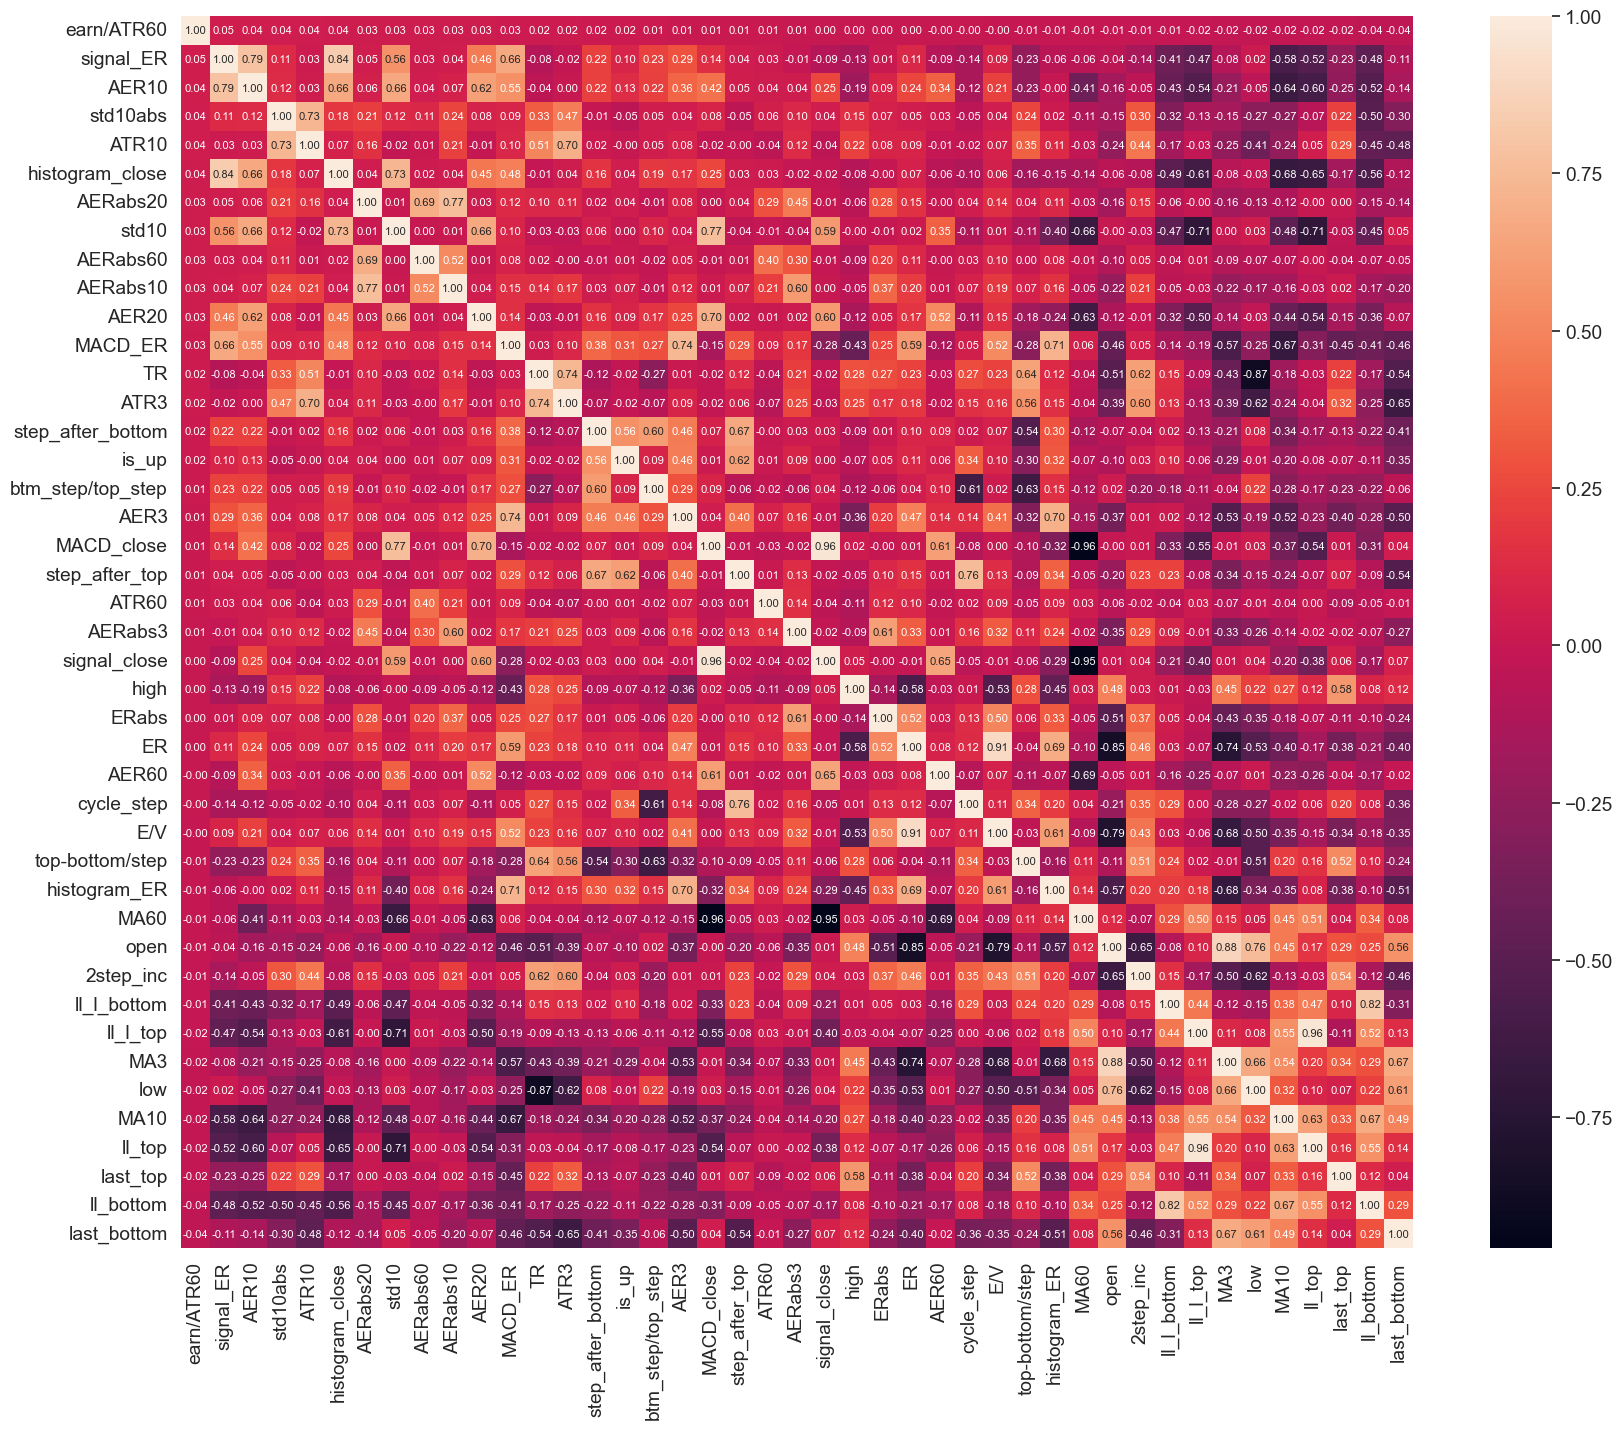

In [63]:
heatmap_data = full_data.df.iloc[:, :].copy()

target.reset_target(3)
target.drop_others(heatmap_data)
heatmap_data[target.target_name()] = heatmap_data[target.target_name()] / heatmap_data['ATR60']
drop_col(heatmap_data, [target.target_name()])
drop_col(heatmap_data, ['hold_step'])

base_atr = 'ATR60'

heatmap_data['earn/ATR60'] = heatmap_data['earn'] / heatmap_data['ATR60']

# heatmap_data['max_after_top'] = heatmap_data['max_after_top'] / heatmap_data[base_atr]
# heatmap_data['min_after_top'] = heatmap_data['min_after_top'] / heatmap_data[base_atr]


# outlire_value = 10
# outlire_idx = heatmap_data[heatmap_data['max_after_top'] > outlire_value].index
# heatmap_data.loc[outlire_idx, 'max_after_top'] = outlire_value

for feat in price_feats:
    heatmap_data[feat] = (heatmap_data[feat] - 1) / heatmap_data[base_atr]

for feat in dprice_feats:
    heatmap_data[feat] = heatmap_data[feat] / heatmap_data[base_atr]

for feat in (tr_feats - {base_atr}):
    heatmap_data[feat] = heatmap_data[feat] / heatmap_data[base_atr]

# for feat in (vol_feats - {'AQAV60'}):
#     heatmap_data[feat] = heatmap_data[feat] / heatmap_data['AQAV60']

# for feat in (voltr_feats - {'AVT60'}):
#     heatmap_data[feat] = heatmap_data[feat] / heatmap_data['AVT60']
    
# for feat in (tn_feats - {'AT60'}):
#     heatmap_data[feat] = heatmap_data[feat] / heatmap_data['AT60']


# heatmap_data['ll_top'] = heatmap_data['ll_top'] - heatmap_data['last_top']
# heatmap_data['ll_bottom'] = heatmap_data['ll_bottom'] - heatmap_data['last_bottom']

heatmap_data.replace([np.inf, -np.inf], np.nan, inplace=True)
heatmap_data.dropna(axis=0, how='any', inplace=True)

# drop_col(heatmap_data, price_feats - {max_100, min_100})
# drop_col(heatmap_data, dprice_feats)
# drop_col(heatmap_data, tr_feats)
drop_col(heatmap_data, tn_feats)
# drop_col(heatmap_data, vol_feats)
# drop_col(heatmap_data, set(full_data.cols_of_features([FeatTypes.OTHERS])))

# heatmap_data['ave_after_top'] = (heatmap_data['max_after_top'] + heatmap_data['min_after_top']) / 2
target_name = 'earn/ATR60'
# max_loss_idx = heatmap_data[heatmap_data['earn/ATR60'] < -0.5001].index
# print(len(max_loss_idx))

cols = [c for c in heatmap_data.columns if c not in ['earn', 'is_earn', 'max_after_top', 'min_after_top']]
heatmap_font(heatmap_data.iloc[:, :].loc[:, cols], target=target_name)

up_idx = heatmap_data[heatmap_data['is_up'] == 1].index
down_idx = heatmap_data[heatmap_data['is_up'] == 0].index
# drop_col(heatmap_data, ['is_up'])

In [8]:
# up_loss_idx = [idx for idx in max_loss_idx if idx in up_idx]
# print(len(up_loss_idx))
# heatmap_font(heatmap_data.loc[up_idx, :], target=target_name)
# heatmap_data.loc[up_loss_idx].head()

In [9]:
# down_loss_idx = [idx for idx in max_loss_idx if idx in down_idx]
# print(len(down_loss_idx))
# heatmap_font(heatmap_data.loc[down_idx, :], target=target_name)
# heatmap_data.loc[down_loss_idx].head()

In [10]:
full_data.df.head(10)

,open,high,low,TR,last_top,step_after_top,last_bottom,step_after_bottom,is_up,cycle_step,hold_step,earn,earn_after_3,is_earn,max_after_top,min_after_top,ER,ERabs,2step_inc,top-bottom/step,btm_step/top_step,ll_top,ll_bottom,ll_l_top,ll_l_bottom,E/V,MA3,MA10,MA60,ATR3,ATR10,ATR60,AER3,AER10,AER20,AER60,AERabs3,AERabs10,AERabs20,AERabs60,std10,std10abs,MACD_close,signal_close,histogram_close,MACD_ER,signal_ER,histogram_ER
60,1.000064,1.000163,0.999885,0.000278,1.000192,2.0,0.999450,2.0,0.0,0.0,2.0,-0.000230,0.000238,0,0.000277,-0.000466,-0.065693,0.065693,0.000174,0.000247,1.000000,1.001667,0.998708,0.001475,-0.000742,-0.000032,1.000032,0.999472,0.999501,0.000557,0.000560,0.000606,0.141996,0.063728,-0.074357,-0.024946,0.246209,0.357644,0.348710,0.412185,0.000134,0.000326,0.000057,-0.000025,0.000083,0.041494,0.024679,0.016815
63,0.999744,1.000201,0.999736,0.000465,1.000231,1.0,0.999489,1.0,0.0,0.0,2.0,-0.000307,0.000254,0,0.000056,-0.000392,0.549891,0.549891,0.000487,0.000371,1.000000,0.999955,0.999693,-0.000277,0.000204,0.000485,0.999885,0.999513,0.999309,0.000528,0.000550,0.000598,0.239553,0.173072,0.019274,-0.008623,0.389052,0.402617,0.349369,0.407803,0.000339,0.000410,0.000144,0.000046,0.000098,0.070417,0.040469,0.029949
78,0.999795,1.000117,0.999448,0.000669,1.000743,5.0,0.999448,0.0,0.0,5.0,2.0,0.001147,0.002274,1,0.001692,0.000221,0.382979,0.382979,0.000999,0.001295,0.000000,1.001269,1.000036,0.000526,0.000588,0.000173,0.999927,1.000284,1.000349,0.000485,0.000459,0.000545,-0.223921,-0.189921,-0.108681,-0.034955,0.479240,0.383136,0.387977,0.401913,-0.000367,0.000367,-0.000112,-0.000001,-0.000111,-0.063069,-0.061372,-0.001697
88,0.999955,1.000074,0.999375,0.000699,1.000174,2.0,0.999361,2.0,0.0,0.0,2.0,0.000359,-0.000350,1,0.000854,-0.000597,0.000000,0.000000,0.000174,0.000271,1.000000,1.000465,0.999346,0.000291,-0.000015,0.000000,1.000017,0.999830,0.998647,0.000638,0.000807,0.000587,0.165177,0.100138,-0.044891,-0.028427,0.248511,0.434225,0.408680,0.426792,0.000792,0.000792,0.000394,0.000290,0.000103,0.010165,0.007658,0.002507
117,1.000083,1.000136,0.999789,0.000346,1.000468,4.0,0.999695,4.0,0.0,0.0,2.0,0.000277,0.000366,1,0.000850,-0.000461,-0.231672,0.231672,0.000388,0.000155,1.000000,1.001080,0.999237,0.000612,-0.000458,-0.000199,1.000089,0.999931,1.000603,0.000357,0.000511,0.000567,-0.048872,0.083319,-0.065535,-0.062752,0.315539,0.389788,0.338203,0.393841,0.000120,0.000254,-0.000173,-0.000237,0.000064,0.029569,0.044867,-0.015298
142,1.000190,1.000224,0.999736,0.000488,1.000780,13.0,0.998657,7.0,1.0,6.0,2.0,-0.000313,0.000354,0,0.000512,-0.000533,-0.356050,0.356050,0.000607,0.000265,0.538462,1.002820,0.998722,0.002040,0.000065,-0.000269,0.999987,0.999616,1.001292,0.000720,0.000703,0.000635,-0.209874,-0.073190,-0.126736,-0.096966,0.408530,0.414862,0.417673,0.389897,-0.000120,0.000417,-0.000336,-0.000443,0.000107,0.019583,0.015936,0.003647
158,1.000193,1.000309,0.999961,0.000348,1.000419,3.0,0.999758,1.0,0.0,2.0,2.0,0.000121,0.000964,1,0.000835,-0.000064,-0.556098,0.556098,0.000225,0.000330,0.333333,1.000904,0.999854,0.000485,0.000095,-0.000459,1.000137,1.000191,1.000521,0.000477,0.000591,0.000658,-0.075496,0.063381,-0.006568,-0.072761,0.324272,0.374636,0.417598,0.390270,0.000074,0.000130,-0.000028,-0.000061,0.000032,-0.012852,0.025181,-0.038034
167,0.999748,1.000117,0.999398,0.000719,1.000227,3.0,0.999398,0.0,0.0,3.0,2.0,-0.001147,-0.000770,0,0.000051,-0.001311,0.312441,0.312441,0.000452,0.000829,0.000000,0.999074,0.998415,-0.001153,-0.000983,0.000305,0.999884,0.999565,0.999128,0.000616,0.000610,0.000670,0.238295,0.122902,0.105235,-0.002276,0.359981,0.450746,0.400597,0.413358,0.000415,0.000453,0.000279,0.000174,0.000105,0.047088,0.044123,0.002965
174,1.000299,1.000436,0.999930,0.000506,1.000915,6.0,0.999552,5.0,1.0,1.0,2.0,0.000045,0.001218,1,0.000872,-0.000314,-0.495979,0.495979,0.000664,0.000227,0.833333,1.000864,1.000034,-0.000052,0.000482,-0.000541,1.000048,1.000217,0.999707,0.000592,0.000610,0.000674,-0.054009,0.048022,

In [11]:
heatmap_data.head(10)

,open,high,low,TR,last_top,step_after_top,last_bottom,step_after_bottom,is_up,cycle_step,earn,is_earn,max_after_top,min_after_top,ER,ERabs,2step_inc,top-bottom/step,btm_step/top_step,ll_top,ll_bottom,ll_l_top,ll_l_bottom,E/V,MA3,MA10,MA60,ATR3,ATR10,ATR60,AER3,AER10,AER20,AER60,AERabs3,AERabs10,AERabs20,AERabs60,std10,std10abs,MACD_close,signal_close,histogram_close,MACD_ER,signal_ER,histogram_ER,earn/ATR60
60,0.106114,0.269194,-0.189888,0.459081,0.317224,2.0,-0.907551,2.0,0.0,0.0,-0.000230,0,0.000277,-0.000466,-0.065693,0.065693,0.287065,0.408258,1.000000,2.750577,-2.131767,2.433353,-1.224216,-0.052188,0.052498,-0.871807,-0.823051,0.918721,0.923635,0.000606,0.141996,0.063728,-0.074357,-0.024946,0.246209,0.357644,0.348710,0.412185,0.221649,0.538448,0.094592,-0.042048,0.136640,0.041494,0.024679,0.016815,-0.379121
63,-0.427666,0.336024,-0.440677,0.776701,0.386936,1.0,-0.854201,1.0,0.0,0.0,-0.000307,0,0.000056,-0.000392,0.549891,0.549891,0.814037,0.620569,1.000000,-0.075803,-0.513652,-0.462739,0.340549,0.811057,-0.191960,-0.813697,-1.154822,0.883240,0.919483,0.000598,0.239553,0.173072,0.019274,-0.008623,0.389052,0.402617,0.349369,0.407803,0.566624,0.685307,0.240254,0.076800,0.163453,0.070417,0.040469,0.029949,-0.513506
78,-0.375423,0.213817,-1.013146,1.226963,1.363085,5.0,-1.013146,0.0,0.0,5.0,0.001147,1,0.001692,0.000221,0.382979,0.382979,1.832986,2.376231,0.000000,2.328371,0.065264,0.965286,1.078410,0.317355,-0.134050,0.520869,0.640043,0.889870,0.842279,0.000545,-0.223921,-0.189921,-0.108681,-0.034955,0.479240,0.383136,0.387977,0.401913,-0.674314,0.674314,-0.205112,-0.001954,-0.203158,-0.063069,-0.061372,-0.001697,2.104148
88,-0.075962,0.125453,-1.064050,1.189503,0.296944,2.0,-1.087645,2.0,0.0,0.0,0.000359,1,0.000854,-0.000597,0.000000,0.000000,0.296944,0.461530,1.000000,0.791851,-1.113541,0.494907,-0.025896,0.000000,0.028582,-0.289060,-2.302210,1.086685,1.372964,0.000587,0.165177,0.100138,-0.044891,-0.028427,0.248511,0.434225,0.408680,0.426792,1.347931,1.347931,0.670134,0.494291,0.175843,0.010165,0.007658,0.002507,0.611588
117,0.146296,0.239448,-0.371413,0.610862,0.825231,4.0,-0.538012,4.0,0.0,0.0,0.000277,1,0.000850,-0.000461,-0.231672,0.231672,0.683711,0.272649,1.000000,1.904838,-1.345329,1.079607,-0.807317,-0.351571,0.156846,-0.122172,1.063146,0.628975,0.900946,0.000567,-0.048872,0.083319,-0.065535,-0.062752,0.315539,0.389788,0.338203,0.393841,0.211598,0.447798,-0.304311,-0.417082,0.112771,0.029569,0.044867,-0.015298,0.487603
142,0.299055,0.351923,-0.416007,0.767930,1.228261,13.0,-2.114210,7.0,1.0,6.0,-0.000313,0,0.000512,-0.000533,-0.356050,0.356050,0.954839,0.417809,0.538462,4.439361,-2.012211,3.211100,0.101999,-0.423466,-0.020293,-0.604197,2.034115,1.133560,1.106663,0.000635,-0.209874,-0.073190,-0.126736,-0.096966,0.408530,0.414862,0.417673,0.389897,-0.188746,0.656382,-0.528555,-0.697709,0.169154,0.019583,0.015936,0.003647,-0.493032
158,0.293872,0.469165,-0.059290,0.528455,0.636208,3.0,-0.367083,1.0,0.0,2.0,0.000121,1,0.000835,-0.000064,-0.556098,0.556098,0.342336,0.501645,0.333333,1.373983,-0.222209,0.737775,0.144874,-0.698303,0.208632,0.290315,0.791918,0.725573,0.899044,0.000658,-0.075496,0.063381,-0.006568,-0.072761,0.324272,0.374636,0.417598,0.390270,0.112182,0.197921,-0.042783,-0.092022,0.049239,-0.012852,0.025181,-0.038034,0.183454
167,-0.375954,0.173828,-0.898449,1.072277,0.338561,3.0,-0.898449,0.0,0.0,3.0,-0.001147,0,0.000051,-0.001311,0.312441,0.312441,0.673584,1.237009,0.000000,-1.381529,-2.364870,-1.720090,-1.466422,0.455100,-0.172312,-0.649581,-1.300662,0.919503,0.910475,0.000670,0.238295,0.122902,0.105235,-0.002276,0.359981,0.450746,0.400597,0.413358,0.619450,0.676358,0.415663,0.259136,0.156527,0.047088,0.044123,0.002965,-1.711011
174,0.443871,0.646453,-0.103553,0.750006,1.357250,6.0,-0.664047,5.0,1.0,1.0,0.000045,1,0.000872,-0.000314,-0.495979,0.495979,0.985263,0.336883,0.833333,1.280842,0.050269,-0.076408,0.714316,-0.802099,0.070711,0.322020,-0.434286,0.877856,0.905235,0.000674,-0.054009,0.048022,0.058327,

Easy to loose

In [12]:
# magic_data = heatmap_data.copy()
# magic_data['top_delta'] = magic_data['last_top'] / (magic_data['last_top'] - magic_data['last_bottom'])
# # cond1 = (magic_data['MA3'] > -0.3) & (magic_data['MA3'] < -0.215)
# # cond2 = (magic_data['MA3'] > 0.02) & (magic_data['MA3'] < 0.1)
# # ma3_cond = cond1 | cond2

# ma3_cond = (magic_data['MA3'] > -0.7)

# ma10_cond = (magic_data['MA10'] > -0.2)

# ma60_cond = (magic_data['MA60'] < 3.4)

# # Top condition
# magic_data['top_decrease'] = magic_data['ll_top'] - magic_data['last_top']
# # top_cond = (magic_data['last_top'] > 1) & (magic_data['top_delta'] > 0.6)
# top_cond = (magic_data['last_top'] > 1)
# ll_top_cond = (magic_data['ll_top'] > 1.8)
# top_dec_cond = (magic_data['top_decrease'] > 0.7)
# top_step_cond = (magic_data['step_after_top'] != 2)

# # Bottom condition

# bottom_cond = (magic_data['last_bottom'] > -2)

# bottom_step_cond = (magic_data['step_after_bottom'] < 6.5)

# ll_bottom_cond = (magic_data['ll_bottom'] > -3)

# cycle_step_cond = (magic_data['cycle_step'] != 7)

# atr10_cond = (magic_data['ATR10'] > 0.86)

# low_cond = (magic_data['low'] < -0.24)

# aer3_cond = (magic_data['AER3'] < 0.05)
# aer10_cond = (magic_data['AER10'] < 0.05)

# TR_cond = (magic_data['TR'] < 2)

# magic_data = magic_data[ma3_cond & ma10_cond & ma60_cond & ll_bottom_cond & top_cond & ll_top_cond &
#                           low_cond & TR_cond & aer10_cond & aer3_cond].copy()
# # magic_data = heatmap_data[top_cond & bottom_cond & ll_bottom_cond & top_step_cond &
# #                           cycle_step_cond & low_cond & bottom_step_cond & aer10_cond & ma60_cond].copy()

# magic_data['index'] = magic_data.index

# print(f"Total: {len(magic_data)}")
# print(f"Ave earn_atr60: {magic_data['earn/ATR60'].mean()}")
# print(f"Total earn_atr60: {magic_data['earn/ATR60'].sum()}")
# print(f"Ave earn: {magic_data['earn'].mean() * 100}")
# print(f"Total earn: {magic_data['earn'].sum() - 0.00002 * len(magic_data)}")
# print(f"Earn rate: {magic_data['is_earn'].sum() / len(magic_data) * 100} %")

# plt_A_B(magic_data, 'index', target_name, cut_num=10)
# plt_box_A_B(magic_data, 'index', target_name, cut_num=10)

Low AER10

Total: 2332
Ave earn_atr60: -0.07969686639416888
Total earn_atr60: -185.85309243120184
Ave earn: -0.0048861251965006385
Total earn: -0.11394443958239489
Earn rate: 42.881646655231556 %


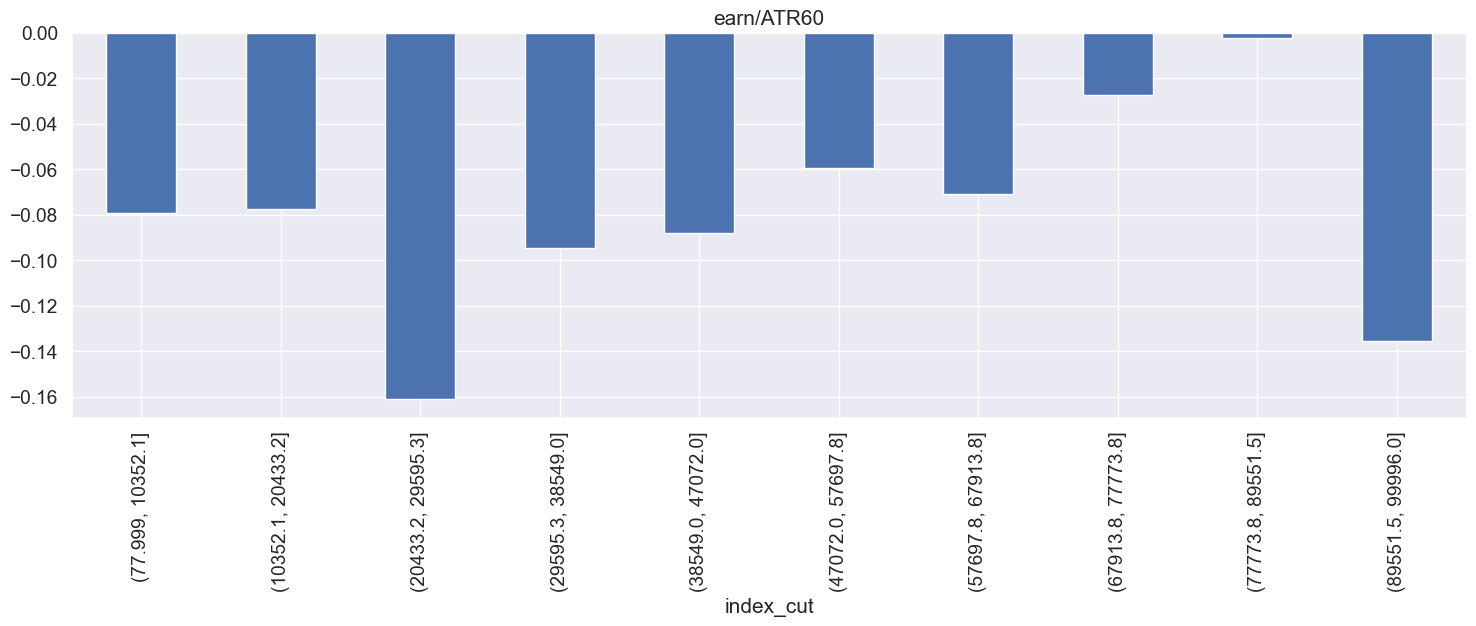

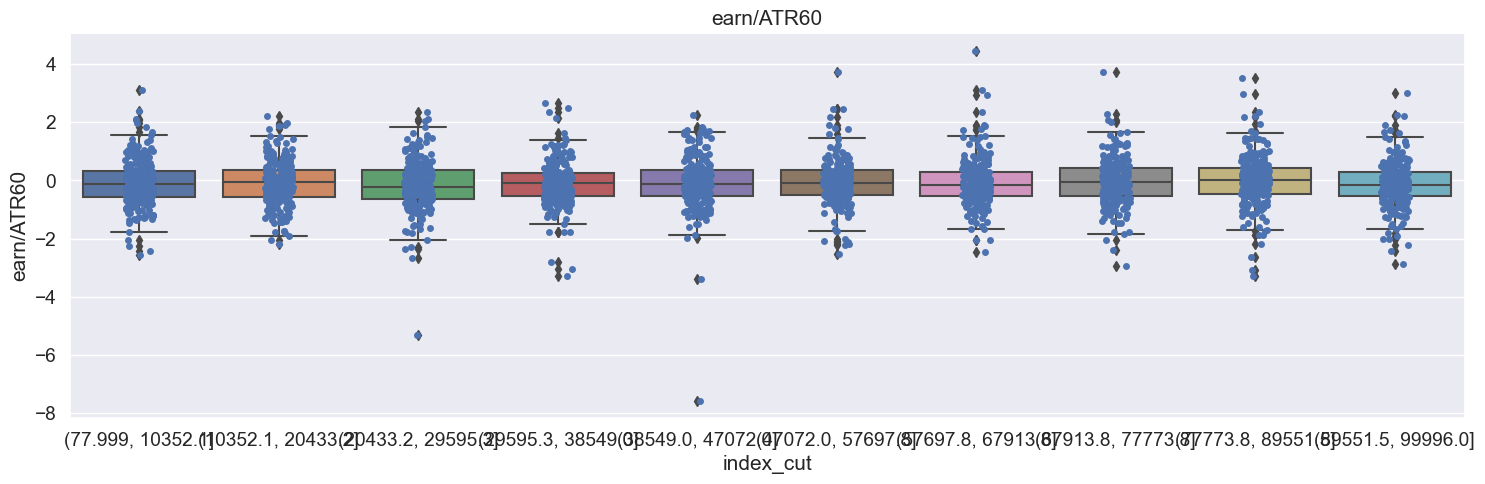

In [109]:
magic_data = heatmap_data.copy()

er_cond = (magic_data['ER'] < -0.1) | (magic_data['ER'] > 0.05)
aer10_cond = (magic_data['AER10'] < 0.03)
aer20_cond = (magic_data['AER20'] < 0.085)
aerabs10_cond = (magic_data['AERabs10'] < 0.57)

ma60_cond = magic_data['MA60'] < 5.5

last_bottom_cond = magic_data['last_bottom'] > -4

_2step_inc_cond = magic_data['2step_inc'] > 0.08

open_cond = (magic_data['open'] < 0.15) | (magic_data['open'] > 0.25)

atr10_cond = (magic_data['ATR10'] > 0.6) & (magic_data['ATR10'] < 1.78)

step_cond = (magic_data['cycle_step'] <= 5) | (magic_data['btm_step/top_step'] <= 0.2)

magic_data = magic_data[er_cond & aer10_cond & aer20_cond & aerabs10_cond & ma60_cond & last_bottom_cond &
                        _2step_inc_cond & open_cond & atr10_cond & step_cond]

magic_data['index'] = magic_data.index

print(f"Total: {len(magic_data)}")
print(f"Ave earn_atr60: {magic_data['earn/ATR60'].mean()}")
print(f"Total earn_atr60: {magic_data['earn/ATR60'].sum()}")
print(f"Ave earn: {magic_data['earn'].mean() * 100}")
print(f"Total earn: {magic_data['earn'].sum()}")
print(f"Earn rate: {magic_data['is_earn'].sum() / len(magic_data) * 100} %")

plt_A_B(magic_data, 'index', target_name, cut_num=10)
plt_box_A_B(magic_data, 'index', target_name, cut_num=10)

In [37]:
# magic_data = heatmap_data.copy()

# aer10_cond = (magic_data['AER10'] > 0)
# aer60_cond = (magic_data['AER60'] > -0.045)

# std10abs_cond = magic_data['std10abs'] < 0.9
# _2step_inc_cond = magic_data['2step_inc'] > 0.4

# magic_data = magic_data[aer10_cond & aer60_cond & std10abs_cond & _2step_inc_cond]

# magic_data['index'] = magic_data.index

# print(f"Total: {len(magic_data)}")
# print(f"Ave earn_atr60: {magic_data['earn/ATR60'].mean()}")
# print(f"Total earn_atr60: {magic_data['earn/ATR60'].sum()}")
# print(f"Ave earn: {magic_data['earn'].mean() * 100}")
# print(f"Total earn: {magic_data['earn'].sum() - 0.00002 * len(magic_data)}")
# print(f"Earn rate: {magic_data['is_earn'].sum() / len(magic_data) * 100} %")

# plt_A_B(magic_data, 'index', target_name, cut_num=10)
# plt_box_A_B(magic_data, 'index', target_name, cut_num=10)

In [ ]:
# magic_data = heatmap_data.copy()
# magic_data['ll_l_bottom'] = magic_data['ll_bottom'] - magic_data['last_bottom']

# aer10_cond = (magic_data['AER10'] > 0.15)
# ma60_comd = (magic_data['MA60'] < -1) | (magic_data['MA60'] > 0)

# top_cond = magic_data['last_top'] > 1
# ll_top_cond = magic_data['ll_top'] < 0

# open_cond = magic_data['open'] < 0
# high_cond = magic_data['high'] < 0.6

# is_up_cond = magic_data['is_up'] == 0

# cycle_step_cond = (magic_data['cycle_step'] < 3.5) | (magic_data['cycle_step'] > 6.5)

# ll_l_bottom_cond = magic_data['ll_l_bottom'] < 0.2

# ma3_cond = magic_data['MA3'] < 0

# magic_data = magic_data[(is_up_cond | ma3_cond) & ma60_comd & open_cond & top_cond & high_cond & ll_top_cond & cycle_step_cond & ll_l_bottom_cond]

# magic_data['index'] = magic_data.index

# print(f"Total: {len(magic_data)}")
# print(f"Ave earn_atr60: {magic_data['earn/ATR60'].mean()}")
# print(f"Total earn_atr60: {magic_data['earn/ATR60'].sum()}")
# print(f"Ave earn: {magic_data['earn'].mean() * 100:.4f} %")
# print(f"Total earn: {magic_data['earn'].sum() - 0.00002 * len(magic_data)}")
# print(f"Earn rate: {magic_data['is_earn'].sum() / len(magic_data) * 100} %")

# plt_A_B(magic_data, 'index', target_name, cut_num=10)
# plt_box_A_B(magic_data, 'index', target_name, cut_num=10)

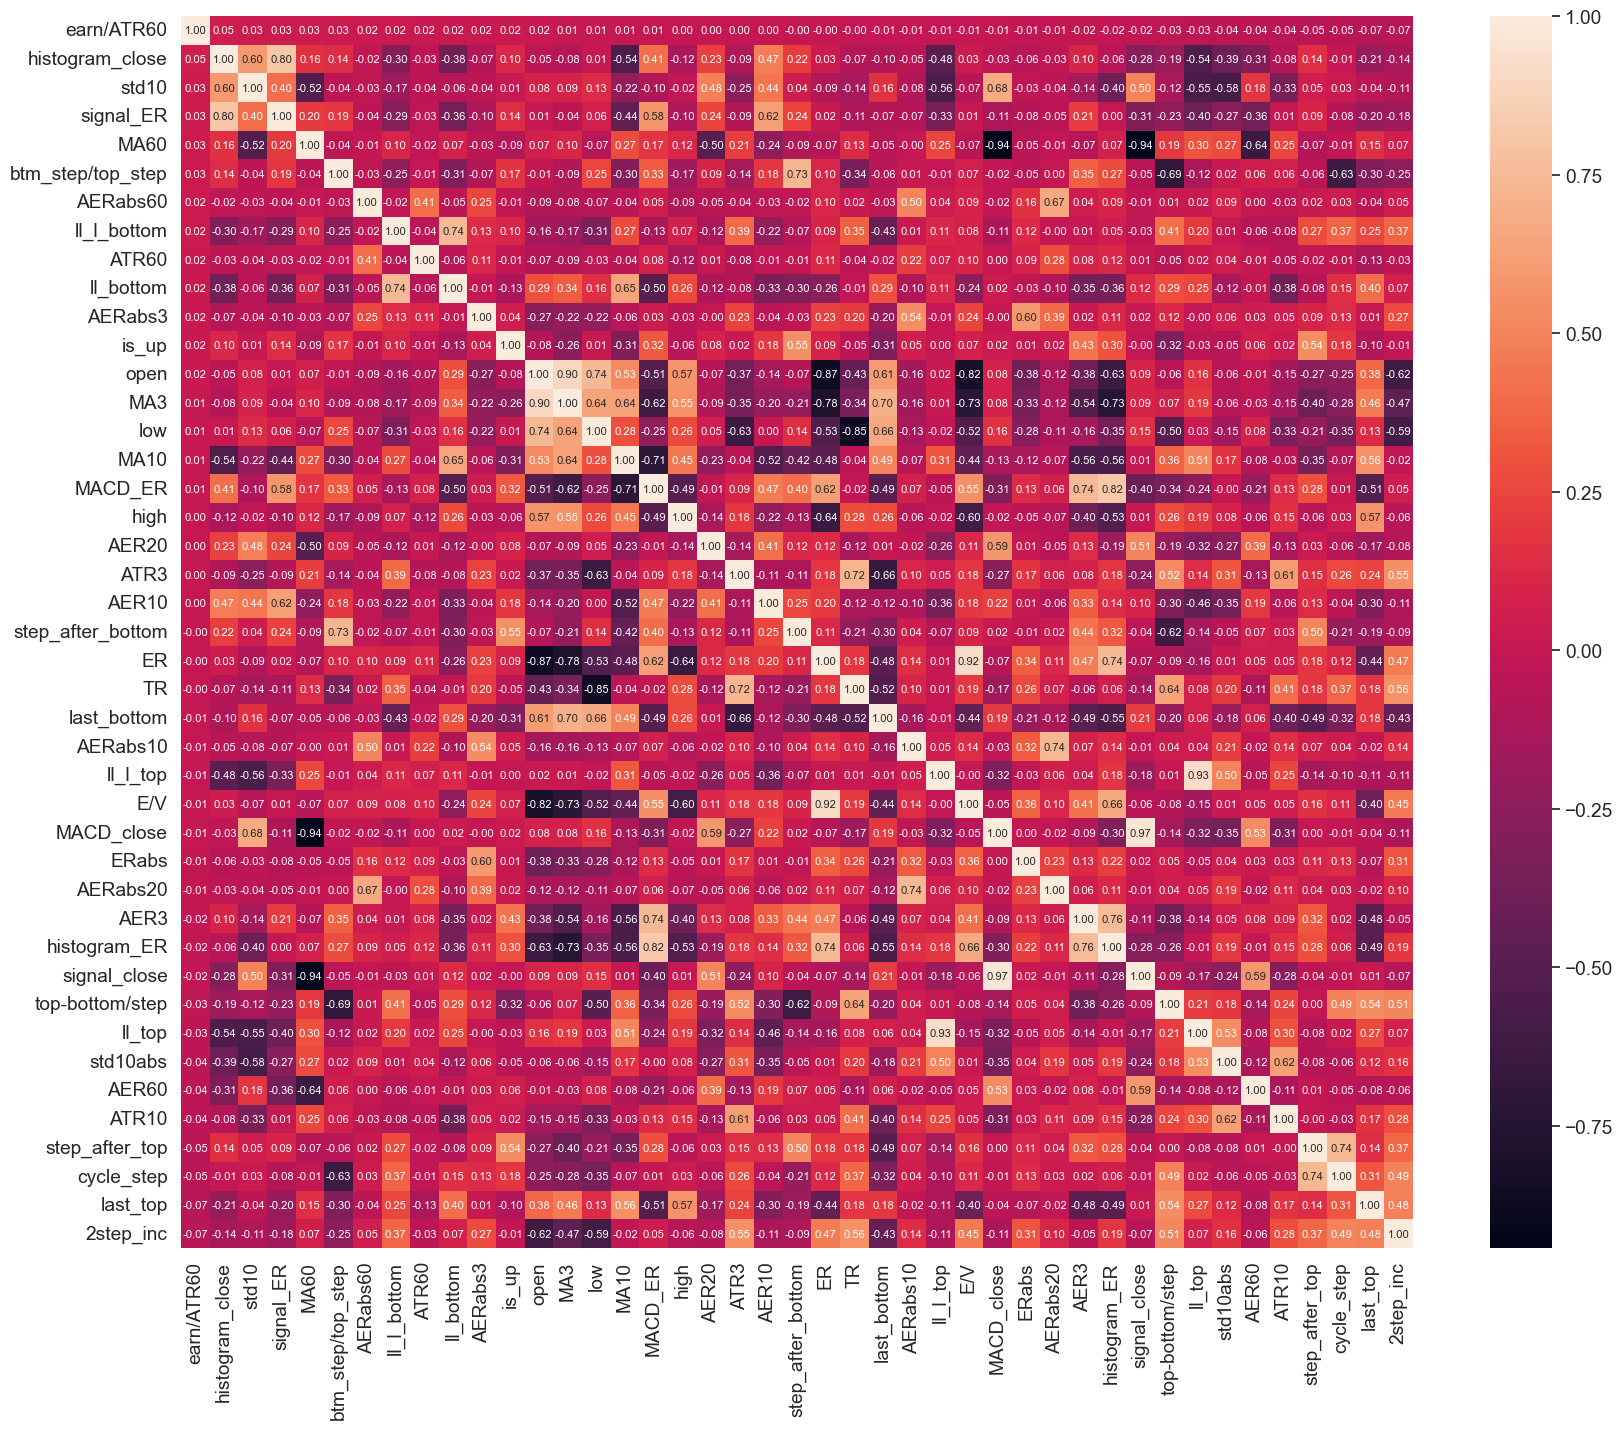

In [98]:
# ma10_data = heatmap_data[ma10_cond & top_cond & ll_bottom_cond].loc[:, :].copy()
heatmap_font(magic_data.loc[:, cols], target_name)

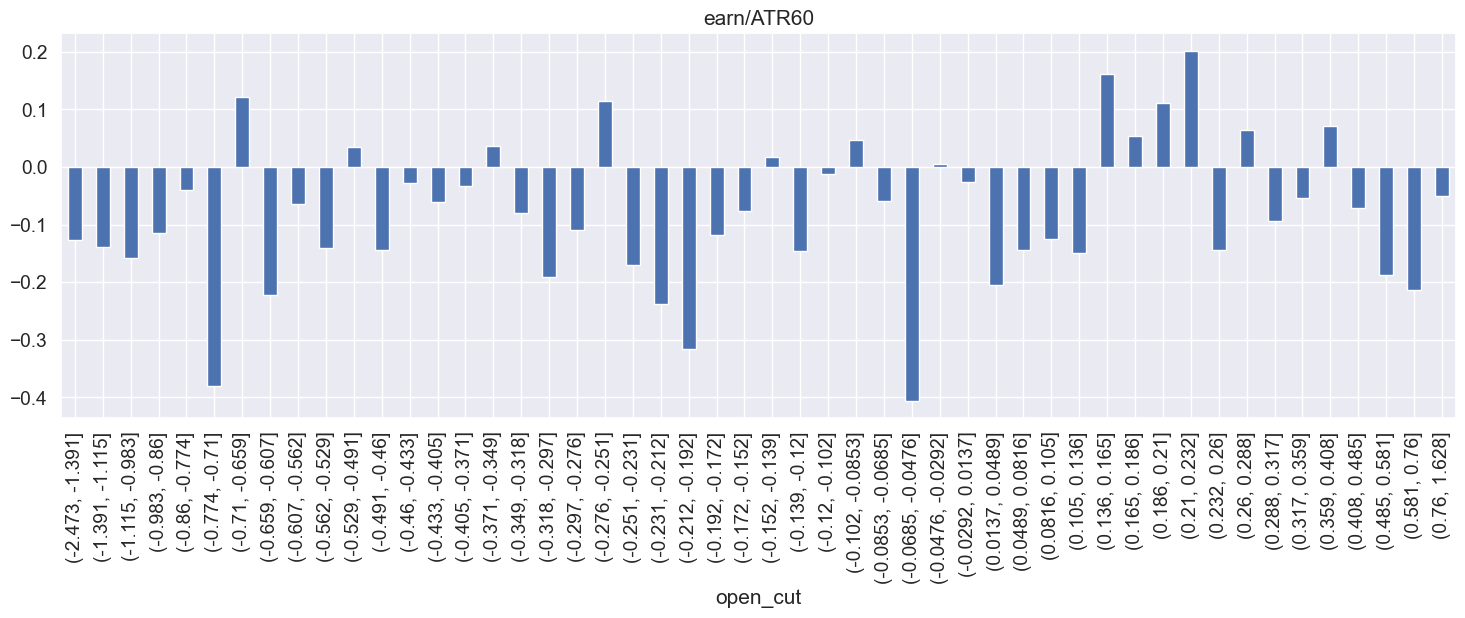

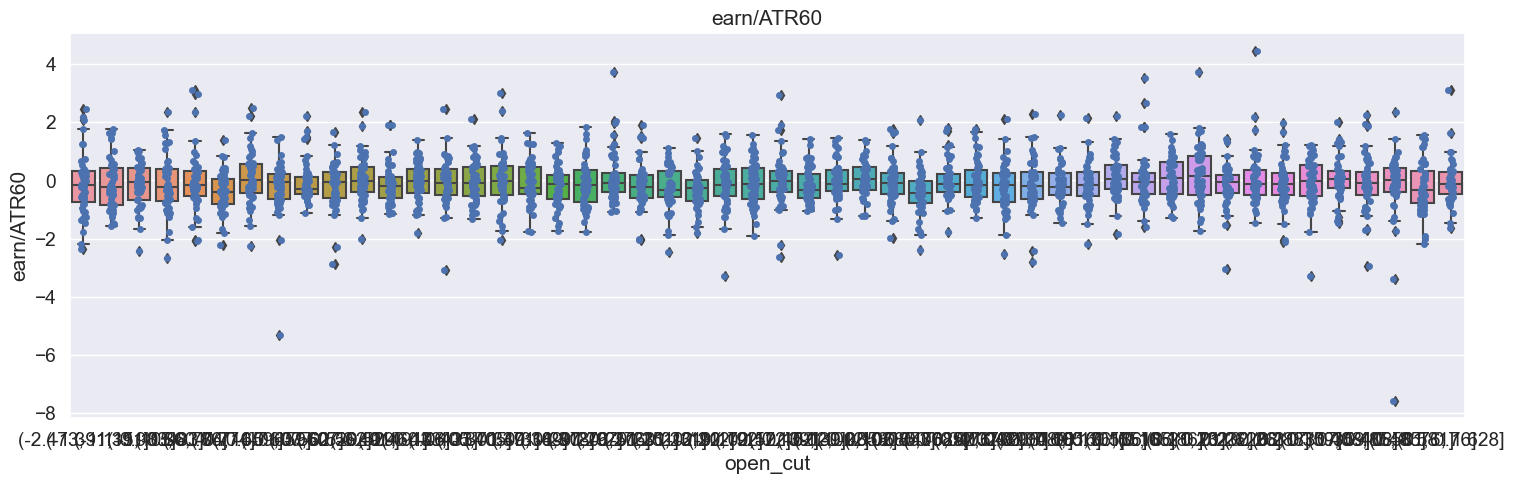

In [112]:
# checked = 'is_up'
checked = 'open'
# checked = 'low'
# checked = 'high'
# checked = 'btm_step/top_step'
# checked = 'step_after_top'
# checked = 'step_after_bottom'
# checked = 'cycle_step'
# checked = 'top_delta'
# checked = 'ER'
# checked = 'AER10'
# checked = 'AERabs10'
# checked = 'AER20'
# checked = 'AER60'
# checked = 'MA60'
# checked = 'signal_ER'
# checked = 'histogram_close'
# checked = 'top-bottom/step'
# checked = 'std10'
# checked = 'ER'
# checked = 'ATR10'
# checked = 'ATR3'
# checked = 'ATR10'
# checked = 'last_bottom'
# checked = 'll_l_bottom'
# checked = 'last_top'
# checked = '2step_inc'

# plot_data = heatmap_data[(heatmap_data['MA3'] > 0) & (heatmap_data['MA3'] < -0.202)].loc[:, :].copy()
# plot_data = heatmap_data[ma10_cond].loc[:, :].copy()
# plot_data = heatmap_data.iloc[:, :].copy()
plot_data = magic_data.copy()
# plot_data = magic_data[magic_data['2step_inc'] < 0.18].copy()

plot_data['index'] = plot_data.index
bias = 0

# plt_A_B(plot_data, 'index', 'ATR10', cut_num=10)
# plt_A_B(plot_data, 'index', 'earn/ATR10', cut_num=10)
# plt_A_B(plot_data, 'index', 'ATR10', cut_num=10)

# plt_A_B(plot_data, 'index', checked, cut_num=10, bias=bias)
# plt_box_A_B(plot_data, 'index', checked, cut_num=50)

plt_A_B(plot_data, checked, target_name, cut_num=50)
plt_box_A_B(plot_data, checked, target_name, cut_num=50)
# histplot(plot_data[checked])
# sns.set()
# cols = ['ATR3','AERabs10', target_name]
# sns.pairplot(plot_data[cols], height = 2.5)
# plt.show()

In [105]:
# plot_data[(plot_data[checked] > 0.127) & (plot_data[checked] < 0.137)]
plot_data[(plot_data[checked] > 0.17)]
# plot_data[(plot_data[target_name] > 1.9)]

,open,high,low,TR,last_top,step_after_top,last_bottom,step_after_bottom,is_up,cycle_step,earn,is_earn,max_after_top,min_after_top,ER,ERabs,2step_inc,top-bottom/step,btm_step/top_step,ll_top,ll_bottom,ll_l_top,ll_l_bottom,E/V,MA3,MA10,MA60,ATR3,ATR10,ATR60,AER3,AER10,AER20,AER60,AERabs3,AERabs10,AERabs20,AERabs60,std10,std10abs,MACD_close,signal_close,histogram_close,MACD_ER,signal_ER,histogram_ER,earn/ATR60,index
22969,0.127473,0.245198,-0.203957,0.449155,0.305185,3.0,-0.610370,1.0,0.0,2.0,-0.000446,0,0.000049,-0.000589,-0.298831,0.298831,0.170964,0.457778,0.333333,2.842646,-0.605871,2.537461,0.004499,-0.262333,0.050739,0.372146,-2.119237,0.567130,1.022633,0.000497,0.073077,-0.004092,0.055431,0.088086,0.272298,0.409141,0.421180,0.417805,0.067921,0.566505,0.501474,0.657399,-0.155925,-0.039026,-0.018669,-0.020358,-0.895880,22969
23409,0.141683,0.199405,-0.600315,0.799720,0.331642,6.0,-1.707539,2.0,1.0,4.0,-0.000112,0,0.000191,-0.000254,-0.202100,0.202100,0.170019,0.679727,0.333333,0.192059,-1.055798,-0.139584,0.651740,-0.228227,-0.387266,-0.399755,0.524208,1.212524,0.971733,0.000355,0.121751,-0.050698,-0.016092,-0.017660,0.389818,0.377035,0.365112,0.365371,-0.098643,0.363201,-0.284467,-0.353118,0.068652,0.015397,0.003838,0.011559,-0.314799,23409
31293,0.076928,0.191808,-0.247196,0.439004,0.243094,2.0,-0.716972,2.0,0.0,0.0,-0.000149,0,0.000072,-0.000453,-0.151869,0.151869,0.176422,0.320022,1.000000,2.403241,-1.807303,2.160147,-1.090331,-0.224199,-0.000684,-0.557782,-2.107717,0.582604,1.310961,0.000363,0.277507,-0.033074,-0.150531,-0.000925,0.378753,0.520814,0.480918,0.397876,0.293271,0.780156,0.262399,0.272817,-0.010419,0.050113,-0.017801,0.067914,-0.412283,31293
43532,-0.012894,0.318490,-0.342990,0.661480,0.284965,3.0,-0.658901,1.0,1.0,2.0,0.000119,1,0.000230,-0.000248,-0.159844,0.159844,0.179231,0.471933,0.333333,2.185592,-1.694318,1.900627,-1.035416,-0.143305,0.105304,0.163629,3.468108,0.729820,1.183315,0.000286,0.063867,0.013723,-0.092419,-0.068059,0.250549,0.450725,0.464200,0.432447,-0.615744,0.684445,-0.961162,-0.987472,0.026309,0.043378,0.029098,0.014280,0.417722,43532
60253,0.096973,0.191619,-0.579511,0.771130,0.372377,2.0,-0.674933,1.0,0.0,1.0,0.000136,1,0.000383,-0.000520,-0.250503,0.250503,0.179206,0.523655,0.500000,0.118695,-1.807579,-0.253682,-1.132646,-0.307133,-0.026118,0.029945,2.951436,0.786905,1.314025,0.000487,-0.002728,-0.093912,0.049186,-0.061995,0.358958,0.343658,0.422331,0.401952,-1.061840,1.061840,-0.821891,-0.787776,-0.034115,0.028092,0.022751,0.005341,0.279213,60253


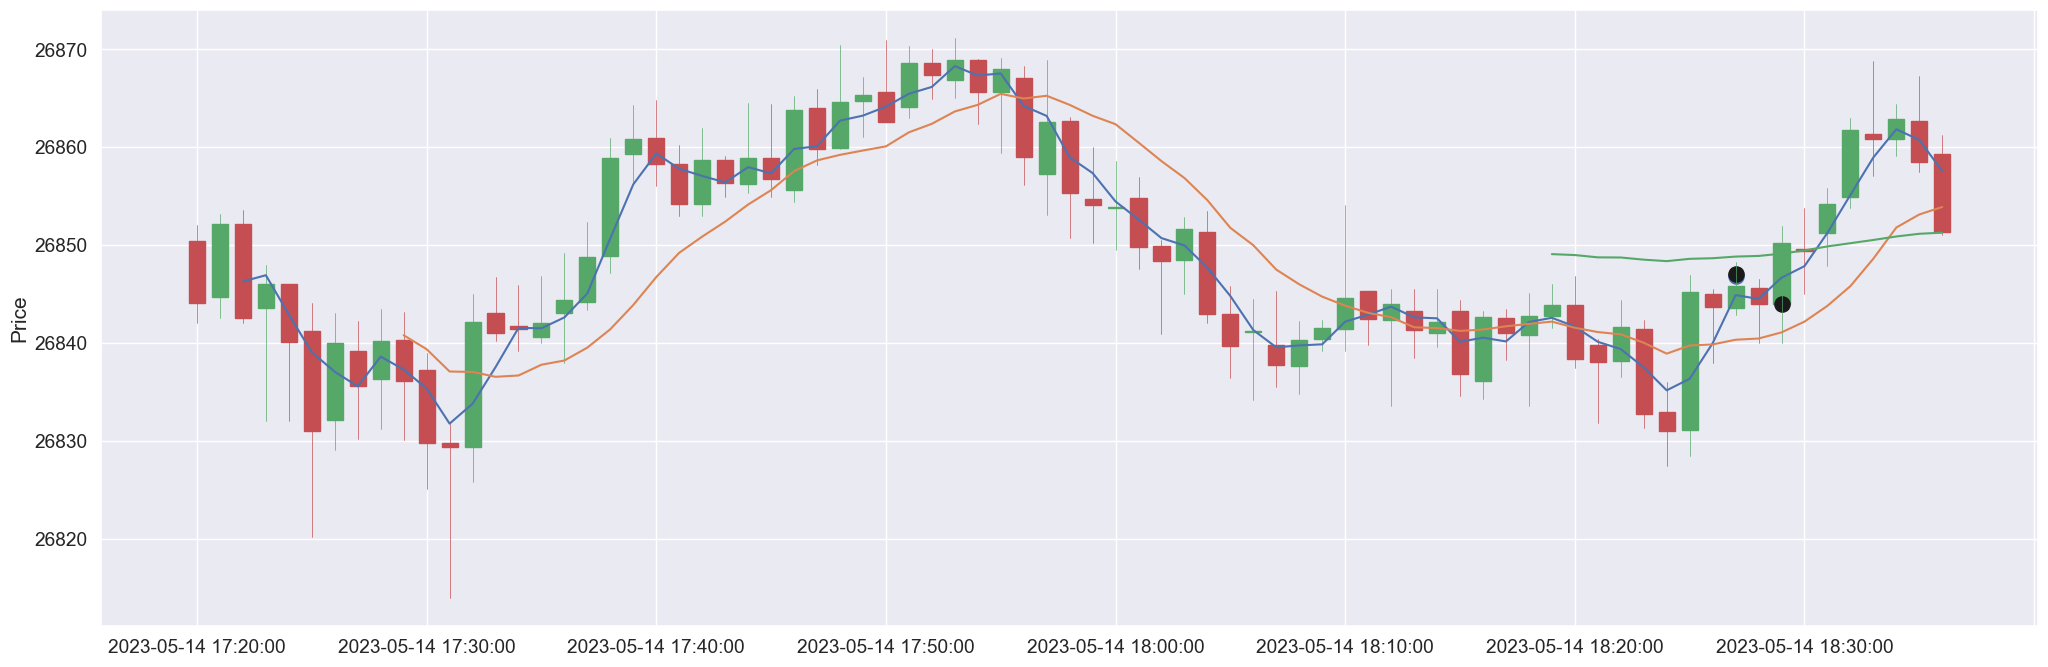

In [107]:
# idx = heatmap_data[(heatmap_data['high'] > 0.4)].index
# print(len(idx))
start = 23409	 # magic_data.index[0]      
# print(f"high: {heatmap_data.loc[start, 'earn/ATR60']}")
last_top_idx = start - sim_data.loc[start, 'step_after_top']
sell_idx = sim_data.loc[start, 'hold_step'] + start + 1
points = [PricePlot.Points(start+1, sim_data.loc[start, 'last_top'], s=120, c='b', label='default'),
          PricePlot.Points(sell_idx, sim_data.loc[start, 'sell_price'], s=120, c='k', label='default'),
          PricePlot.Points(start+1, sim_data.loc[start, 'buy_price'], s=120, c='k', label='default')]
plot(sim_data, last_top_idx-60, start+10, points, mas=[3, 10, 60])

In [ ]:
heatmap_data[heatmap_data['AER10'] > 0.4]

,open,high,low,TR,last_top,step_after_top,last_bottom,step_after_bottom,cycle_step,hold_step,earn,is_earn,max_after_top,min_after_top,ER,lastlast_top,lastlast_bottom,MA3,MA10,MA60,MA300,ATR3,ATR10,ATR60,ATR300,AER3,AER10,AER60,AER300,earn/ATR10,ave_after_top
5916,-0.563238,0.180649,-0.563238,0.743908,0.310866,3.0,-4.844257,10.0,7.0,14.0,-0.002572,0,0.000109,-0.002011,0.757134,-4.303962,-4.844257,-0.537883,-2.321593,-4.985972,-6.510988,1.188848,0.001714,0.402675,0.246243,0.250085,0.448643,0.050170,0.017125,-1.500844,-0.000951
16422,0.093853,0.608970,-0.320963,0.930004,0.645508,3.0,-4.475570,10.0,7.0,2.0,0.000233,1,0.000271,-0.000261,-0.100917,-2.223814,-4.475570,0.031762,-1.056455,-1.341166,13.861365,0.734656,0.000465,1.267051,1.528524,0.044293,0.405142,0.017114,-0.002235,0.501039,0.000005
18077,-1.288129,0.169988,-1.290018,1.460100,2.993673,27.0,-5.116630,9.0,18.0,0.0,0.000179,1,0.000376,-0.001230,0.882220,2.993673,-5.116630,-1.138918,-3.221645,-3.219300,-11.691305,1.420122,0.000358,1.492791,1.565049,0.858768,0.432478,0.089521,0.064085,0.501350,-0.000427
36032,-0.331741,0.143300,-0.542229,0.685581,0.478715,13.0,-4.922051,9.0,4.0,0.0,0.000322,1,0.000693,-0.000060,0.483883,0.478715,-4.922051,-0.530856,-2.052753,-1.075044,-9.517801,1.026945,0.000642,1.481917,1.475424,0.419707,0.400749,0.008395,0.042138,0.500752,0.000316
36944,-0.987664,0.000757,-1.142057,1.142890,0.267918,15.0,-5.133581,10.0,5.0,0.0,0.000233,1,0.000239,-0.001075,0.864181,0.267918,-5.133581,-0.647342,-1.741240,2.511163,-10.945241,0.826787,0.000465,1.139623,1.374061,0.142713,0.447838,-0.072717,0.029505,0.501037,-0.000418
71254,-0.279886,0.212871,-0.393220,0.606189,0.477974,5.0,-5.529713,12.0,7.0,0.0,0.000194,1,0.000343,-0.000418,0.461714,0.477974,-5.529713,-0.415229,-1.187642,-2.293683,-0.395605,0.851582,0.000387,1.380572,1.908390,0.285357,0.404085,0.041236,-0.008251,0.501242,-0.000037


# ML

In [17]:
import xgboost as xgb
from sklearn.model_selection import KFold
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [18]:
def split_data(full: pd.DataFrame, percentage=0.8, target_name='target'):
    # 特征列名
    category_col = [col for col in full if col != target_name]
    end_rows = int(full.shape[0] * percentage)

    x_train = full[category_col][:end_rows].values.astype(np.float64)
    y_train = full[target_name][:end_rows].values.astype(np.float64)

    x_test = full[category_col][end_rows:].values.astype(np.float64)
    y_test = full[target_name][end_rows:].values.astype(np.float64)

    return x_train, y_train, x_test, y_test

ML_data = heatmap_data.loc[:, cols].copy()
x_train, y_train, x_test, y_test = split_data(ML_data, 0.8, target_name)

In [21]:
def xgb_predict(X_train, y_train, X_test, params=None, verbose_eval=100):
    
    if params == None:
        xgb_params = {'eta': 0.05, 'max_depth': 5, 'subsample': 0.8, 'colsample_bytree': 0.8, 
                  'objective': 'reg:linear', 'eval_metric': 'rmse', 'nthread': 4}
    else:
        xgb_params = params

    folds = KFold(n_splits=3, shuffle=True, random_state=2023)
    oof_xgb = np.zeros(len(X_train))
    predictions_xgb = np.zeros(len(X_test))

    for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
        if(verbose_eval):
            print("fold n°{}".format(fold_+1))
            print("len trn_idx  {}".format(len(trn_idx)))
            
        trn_data = xgb.DMatrix(X_train[trn_idx], y_train[trn_idx])
        val_data = xgb.DMatrix(X_train[val_idx], y_train[val_idx])

        watchlist = [(trn_data, 'train'), (val_data, 'valid_data')]
        clf = xgb.train(dtrain=trn_data,
                        num_boost_round=20000,
                        evals=watchlist,
                        early_stopping_rounds=200,
                        verbose_eval=verbose_eval,
                        params=xgb_params)
        
        
        oof_xgb[val_idx] = clf.predict(xgb.DMatrix(X_train[val_idx]), ntree_limit=clf.best_ntree_limit)
        predictions_xgb += clf.predict(xgb.DMatrix(X_test), ntree_limit=clf.best_ntree_limit) / folds.get_n_splits()

    if(verbose_eval):
        print("CV RMSE score: {:<8.8f}".format(sqrt(mean_squared_error(oof_xgb, y_train))))
    return oof_xgb, predictions_xgb

In [22]:
oof, predictions = xgb_predict(x_train, y_train, x_test, verbose_eval=5000)

print("-"*100, end="\n\n")
print("CV normal RMSE scores of predicting {} \nis {:<8.8f}".
        format(ML_data.columns, sqrt(mean_squared_error(predictions, y_test))))

fold n°1
len trn_idx  3685
[21:31:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:1.06091	valid_data-rmse:1.05348


[228]	train-rmse:0.60510	valid_data-rmse:1.01008
fold n°2
len trn_idx  3685
[21:31:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:1.06197	valid_data-rmse:1.05388


e:\Python\Lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[237]	train-rmse:0.61128	valid_data-rmse:0.97461
fold n°3
len trn_idx  3686
[21:31:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:1.05171	valid_data-rmse:1.07461
[234]	train-rmse:0.59287	valid_data-rmse:1.01036
CV RMSE score: 0.97571854
----------------------------------------------------------------------------------------------------

CV normal RMSE scores of predicting Index(['open', 'high', 'low', 'TR', 'last_top', 'step_after_top',
       'last_bottom', 'step_after_bottom', 'is_up', 'cycle_step', 'ER',
       'ERabs', '2step_inc', 'top-bottom/step', 'll_top', 'll_bottom',
       'll_l_top', 'll_l_bottom', 'E/V', 'MA3', 'MA10', 'MA60', 'ATR3',
       'ATR10', 'ATR60', 'AER3', 'AER10', 'AER20', 'AER60', 'AERabs3',
       'AERabs10', 'AERabs20', 'AERabs60', 'std10', 'std10abs', 'MACD_ER',
      

In [23]:
print(np.std(y_test))
print(np.mean(y_test))
pred_std, pred_mean = [np.std(predictions), np.mean(predictions)]
print(pred_std)
print(pred_mean)

0.9478452570060517
0.07564353254166338
0.13287514193964156
0.13872867592816535


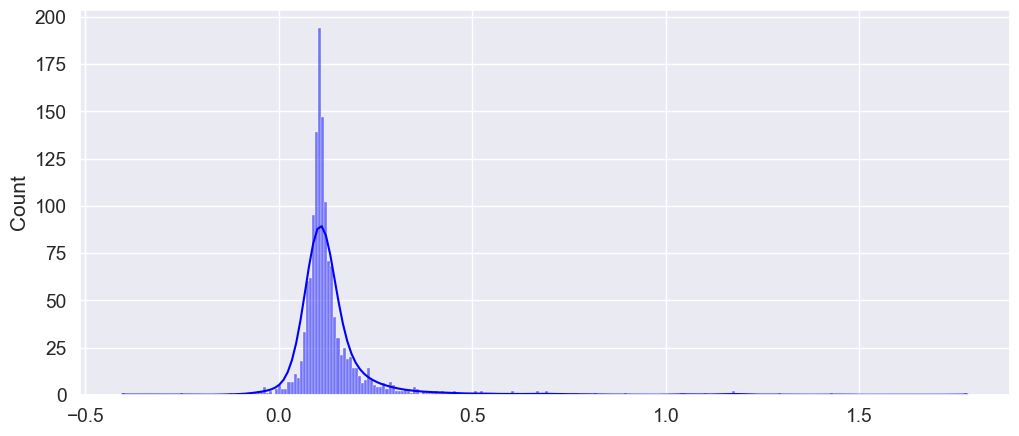

In [24]:
histplot(predictions)

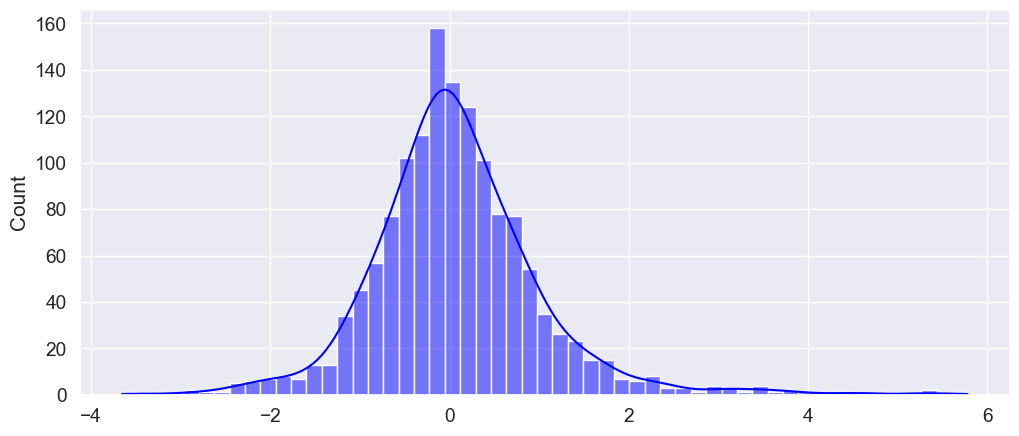

In [25]:
histplot(y_test)

In [26]:
buy_i = [i for i in range(len(y_test)) if predictions[i] > 0.5] 
sell_i = [i for i in range(len(y_test)) if predictions[i] < 0]
print(len(buy_i))
print(len(sell_i))
buy_i

31
20


[93,
 143,
 209,
 343,
 344,
 366,
 381,
 400,
 458,
 498,
 577,
 617,
 627,
 633,
 658,
 660,
 729,
 738,
 756,
 936,
 1083,
 1126,
 1153,
 1237,
 1326,
 1339,
 1352,
 1356,
 1367,
 1368,
 1369]

In [ ]:
x_test[1153]

array([ 2.00704540e+00,  2.09630252e+00, -8.05793398e-01,  2.90209598e+00,
        3.18536329e+00,  2.00000000e+00, -8.05793398e-01,  0.00000000e+00,
        0.00000000e+00,  2.00000000e+00, -7.34087981e-01,  4.16719155e+00,
        6.65089474e-01,  9.81828264e-01,  1.47088287e+00,  1.35414614e+00,
        1.89342853e+00, -9.91415139e-01,  1.61303315e+00,  1.44844469e+00,
        5.17689858e-04, -1.28518474e-01,  4.61356161e-02,  9.04500024e-02,
        4.12206593e-02,  9.21046648e-01,  1.29973235e+00, -5.45569003e-02,
        1.22369585e-02, -6.67938588e-02])

In [ ]:
ML_data.iloc[len(y_train) + 1153, :]

open                 2.007045
high                 2.096303
low                 -0.805793
TR                   2.902096
last_top             3.185363
step_after_top       2.000000
last_bottom         -0.805793
step_after_bottom    0.000000
is_up                0.000000
cycle_step           2.000000
ER                  -0.734088
ll_top               4.167192
ll_bottom            0.665089
ll_l_top             0.981828
ll_l_bottom          1.470883
MA3                  1.354146
MA10                 1.893429
MA60                -0.991415
ATR3                 1.613033
ATR10                1.448445
ATR60                0.000518
AER3                -0.128518
AER10                0.046136
AER30                0.090450
AER60                0.041221
std10                0.921047
std10abs             1.299732
MACD_ER             -0.054557
signal_ER            0.012237
histogram_ER        -0.066794
earn/ATR60           1.861287
Name: 96318, dtype: float64

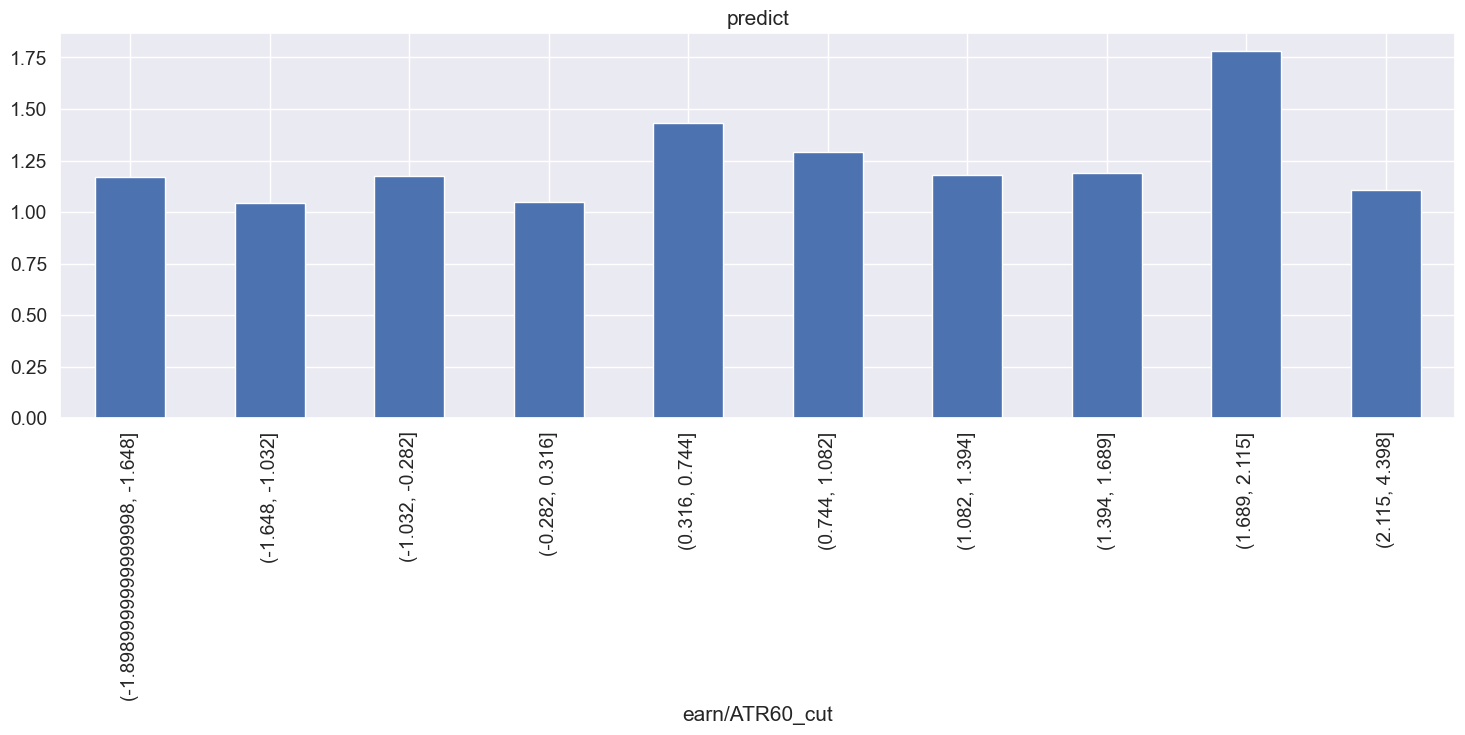

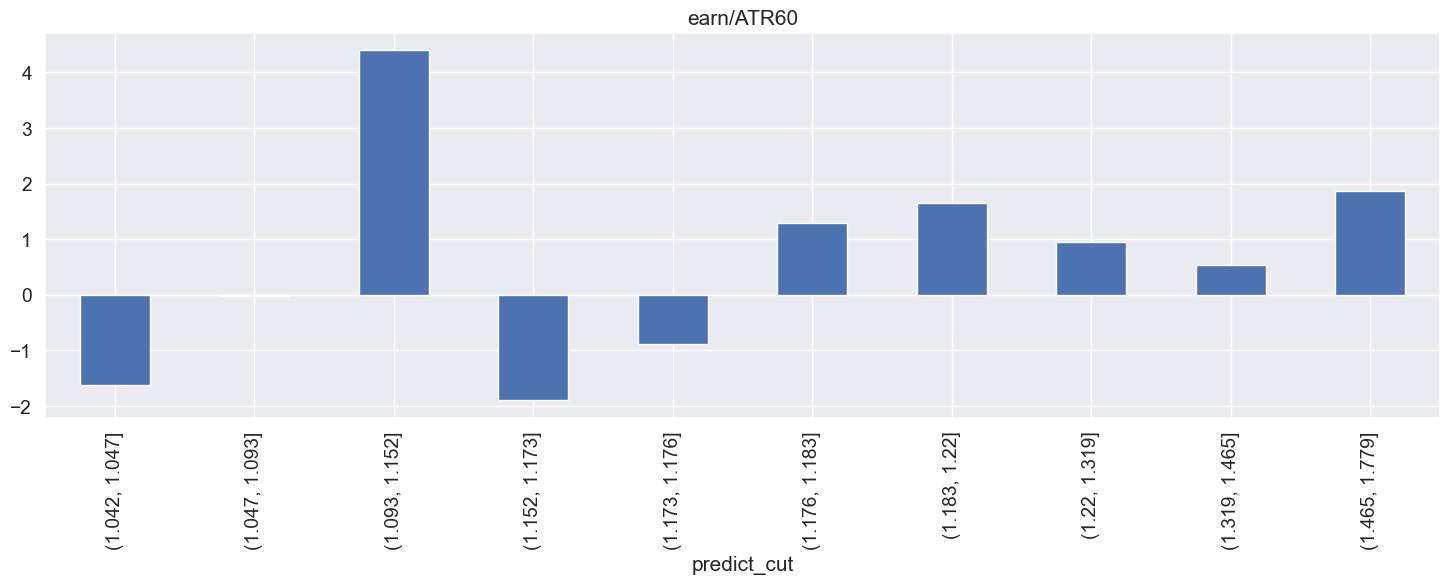

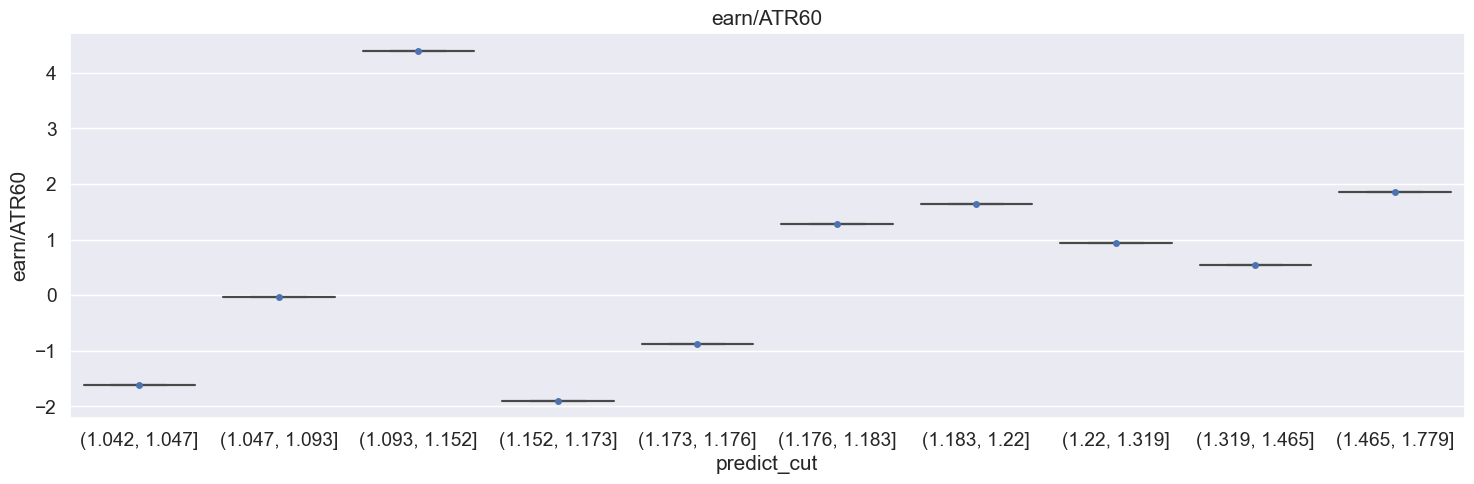

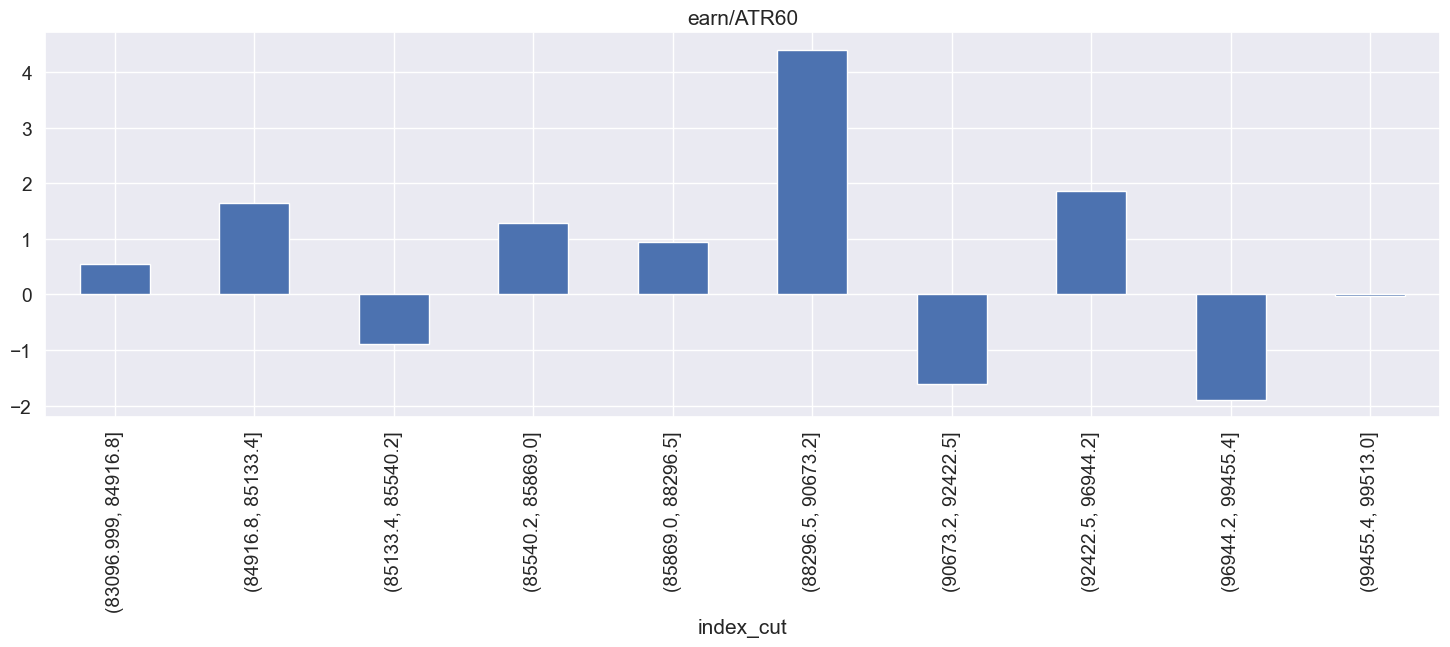

In [31]:
test_df = ML_data.iloc[len(y_train):, :].copy()
test_df['predict'] = predictions
test_df['index'] = test_df.index

pred_earn = test_df[test_df['predict'] > 1].copy()

plt_A_B(pred_earn, target_name, 'predict', cut_num=10)
plt_A_B(pred_earn, 'predict', target_name, cut_num=10)
plt_box_A_B(pred_earn, 'predict', target_name, cut_num=10)
plt_A_B(pred_earn, 'index', target_name, cut_num=10)
# plt_A_B(test_df, 'index', target_name, cut_num=10)
